In [49]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Description: Activity 11: a simple scraper

# Resources
# 

In [50]:
import csv

In [51]:
import re

In [52]:
import os

In [53]:
import requests

In [54]:
import math

In [55]:
import matplotlib.pyplot as plt

In [56]:
from matplotlib import cm as cm

In [57]:
from bs4 import BeautifulSoup

In [58]:
# definitions/parameters
os.chdir(globals()['_dh'][0])
os.chdir('../')
DATA_FOLDER = os.path.join(os.getcwd(), 'data')
CSV_FILE_NAME = 'denver_neighborhoods.csv'
CSV_FILE_PATH = os.path.join(DATA_FOLDER, CSV_FILE_NAME)
BASE_URL = 'https://www.5280.com/neighborhoods/'
HEADERS = {"User-Agent": "Mozilla/5.0 (X11; CrOS x86_64 12871.102.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.141 Safari/537.36"}

In [59]:
def remove_tags(s): 
    tag = re.compile('<.*?>')
    return re.sub(tag, '', s)

In [60]:
if __name__ == "__main__":

    with open(os.path.join(DATA_FOLDER, CSV_FILE_NAME), 'wt') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(['name','population','home_price','schools_score','crime_rank','x_factor'])
        content = requests.get(BASE_URL, headers=HEADERS).content
        soup = BeautifulSoup(content, 'html.parser')
        trs = soup.find_all('tr')
        for tr in trs:
            row = []
            tds = tr.find_all('td')
            if len(tds) == 0:
                continue
            a = tds[0].find('a')
            row.append(a.contents[0].strip())
            pop = tds[2].contents[0]
            pop = re.sub(',', '', pop)
            row.append(int(pop))
            price = tds[3].contents[0]
            price = re.sub('[$,]', '', price)
            row.append(int(price))
            school = tds[6].contents[0]
            row.append(float(school))
            crime = tds[7].contents[0]
            row.append(int(crime))
            xfactor = tds[8].contents[0]
            row.append(float(xfactor))
            writer.writerow(row)

In [61]:
os.chdir(globals()['_dh'][0])
os.chdir('../')
DATA_FOLDER = os.path.join(os.getcwd(), 'data')
CSV_FILE_NAME = 'denver_neighborhoods.csv'
CSV_FILE_PATH = os.path.join(DATA_FOLDER, CSV_FILE_NAME)

In [62]:
def min_max(data, mins, maxs, interval=(0,1)):
    return [ int(((data[i] - mins[i]) / (maxs[i] - mins[i]) * (interval[1] - interval[0]) + interval[0]) * 100000) / 100000 for i in range(len(data))]


In [63]:
def eucl_dist(a, b): 
    sum = 0
    for i in range(len(a)):
        sum += (a[i] - b[i])**2
    return int((1 - math.sqrt(sum / len(a))) * 100000) / 100000

[0.37854, 0.75735, 0.825, 0.08823, 0.76923]
[0.0, 1.0, 0.6, 0.14705, 0.76923]
1.0
0.77361
0.78342


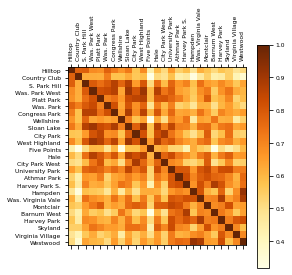

In [64]:
# TODO: finish the similarity analysis
if __name__ == "__main__":

    neighborhoods = []
    matrix = []
    with open(os.path.join(DATA_FOLDER, CSV_FILE_NAME), 'rt') as csv_file:
        reader = csv.reader(csv_file)
        row_count = 0
        for row in reader:
            row_count += 1
            if row_count == 1:
                continue
            row[0] = re.sub('Washington', 'Was.', row[0])
            row[0] = re.sub('South', 'S.', row[0])
            neighborhoods.append(row[0])
            data = [ int(row[1]), int(row[2]), float(row[3]), int(row[4]), float(row[5])]
            if row_count == 2:
                mins = list(data)
                maxs = list(data)
            else:
                for i in range(len(data)):
                    mins[i] = min(mins[i], data[i])
                    maxs[i] = max(maxs[i], data[i])
            matrix.append(data)
    # print(mins)
    # print(maxs)
    matrix = [ min_max(data, mins, maxs) for data in matrix ]
    # print(matrix)
    

    print(matrix[0])
    print(matrix[1])
    print(eucl_dist(matrix[0], matrix[0]))
    print(eucl_dist(matrix[1], matrix[0]))
    print(eucl_dist(matrix[2], matrix[0]))
    
    dm = []
    for i in range(len(matrix)):
        row = []
        for j in range(len(matrix)):
            row.append(eucl_dist(matrix[i], matrix[j]))
        dm.append(row)
    plt.rc('font', size=6) 
    cmap = cm.get_cmap('YlOrBr')
    img = plt.matshow(dm, cmap=cmap)
    axes = plt.gca()
    axes.set_yticks(list(range(len(neighborhoods))))
    axes.set_yticklabels(neighborhoods)
    axes.set_xticks(list(range(len(neighborhoods))))
    axes.set_xticklabels(neighborhoods, rotation=90)
    fig = plt.gcf() # reference to the plot
    ticks = [x / 10 for x in range(1, 11)]
    fig.colorbar(img, ticks=ticks)
    fig.subplots_adjust(top=0.2)
    plt.show()